
¡Hola, Rodrigo!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">

<b>Revisión 1</b> <a class="tocSkip"></a>


Rodrigo, excelente trabajo con el desarrollo del proyecto, cada vez estas más cercas de convertirte en un cientifico de datos. Haces la carga de los datos, su tratamiento inicial, las gráficas y el desarrollo de la prueba de hipótesis. Solamente te dejo algunos comentario para terminar de complementar el análisis.</div>

<div class="alert alert-block alert-success">

<b>Revisión 2</b> <a class="tocSkip"></a>


Rodrigo, gran trabajo con los ajustes. Realizaste el análisis de duplicados, ajustaste la gráfica y desarrollaste de manera perfecta la prueba de levene. Sigue con el excelente trabajo!

# INTRODUCCIÓN



Estás trabajando como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Tu tarea es encontrar patrones en la información disponible. Quieres comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

Al trabajar con una base de datos, analizarás los datos de los competidores y probarás una hipótesis sobre el impacto del clima en la frecuencia de los viajes.


In [5]:
import pandas as pd

# Cargar archivos CSV
df_company = pd.read_csv('/datasets/project_sql_result_01.csv')
df_neighborhood = pd.read_csv('/datasets/project_sql_result_04.csv')

# Verificar las primeras filas y tipos de datos
print(df_company.head())
print(df_company.info())
print(df_neighborhood.head())
print(df_neighborhood.info())


                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  D

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Para estos análisis iniciales te recomiendo verificar si contamos con registros duplicados</div>




<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Rodrigo, gran trabajo con el análisis de duplicados, de esta forma aseguramos que nuestros resultados no estarán sesgados por estos valores. 

</div>

In [8]:
# Verificar duplicados en el DataFrame de compañías
company_duplicates = df_company[df_company.duplicated()]
print("Duplicados en el DataFrame de compañías:")
print(company_duplicates)

# Si deseas eliminar los duplicados
df_company = df_company.drop_duplicates()

# Verificar duplicados en el DataFrame de ubicaciones de destino
neighborhood_duplicates = df_neighborhood[df_neighborhood.duplicated()]
print("\nDuplicados en el DataFrame de ubicaciones de destino:")
print(neighborhood_duplicates)

# Si deseas eliminar los duplicados
df_neighborhood = df_neighborhood.drop_duplicates()




Duplicados en el DataFrame de compañías:
Empty DataFrame
Columns: [company_name, trips_amount]
Index: []

Duplicados en el DataFrame de ubicaciones de destino:
Empty DataFrame
Columns: [dropoff_location_name, average_trips]
Index: []


Ambos DataFrames no contienen registros duplicados, lo cual es ideal para continuar con el análisis sin necesidad de limpieza adicional en ese aspecto

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
    
    Listo

In [2]:
top_neighborhoods = df_neighborhood.nlargest(10, 'average_trips')
print(top_neighborhoods)


  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


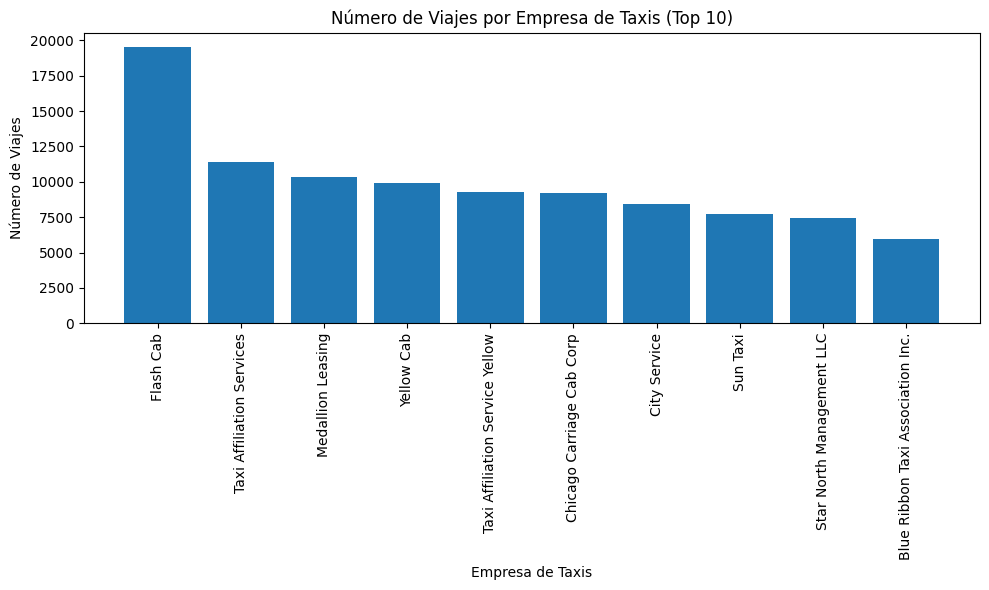

In [9]:
import matplotlib.pyplot as plt

# Filtrar para las 10 empresas con mayor número de viajes
top_10_companies = df_company.nlargest(10, 'trips_amount')

# Gráfico de barras para el número de viajes por empresa
plt.figure(figsize=(10, 6))
plt.bar(top_10_companies['company_name'], top_10_companies['trips_amount'])
plt.title('Número de Viajes por Empresa de Taxis (Top 10)')
plt.xlabel('Empresa de Taxis')
plt.ylabel('Número de Viajes')
plt.xticks(rotation=90)
plt.tight_layout()  # Ajusta el layout para evitar recortes
plt.show()



<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con el desarrollo de la gráfica para visualizar los resultados. Solamente dado que al cliente le interesa el top 10 de las principales empresas con número de viajes, te recomiendo complementar este análisis con una gráfica solamente mostrando el top 10.</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
    
    Listo

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con la gráfica solamente mostrando el top 10.</div>

Los 10 principales barrios en términos de promedio de finalización de viajes en noviembre de 2017 son:

Loop - 10,727.47
River North - 9,523.67
Streeterville - 6,664.67
West Loop - 5,163.67
O'Hare - 2,546.9
Lake View - 2,420.97
Grant Park - 2,068.53
Museum Campus - 1,510
Gold Coast - 1,364.23
Sheffield & DePaul - 1,259.77

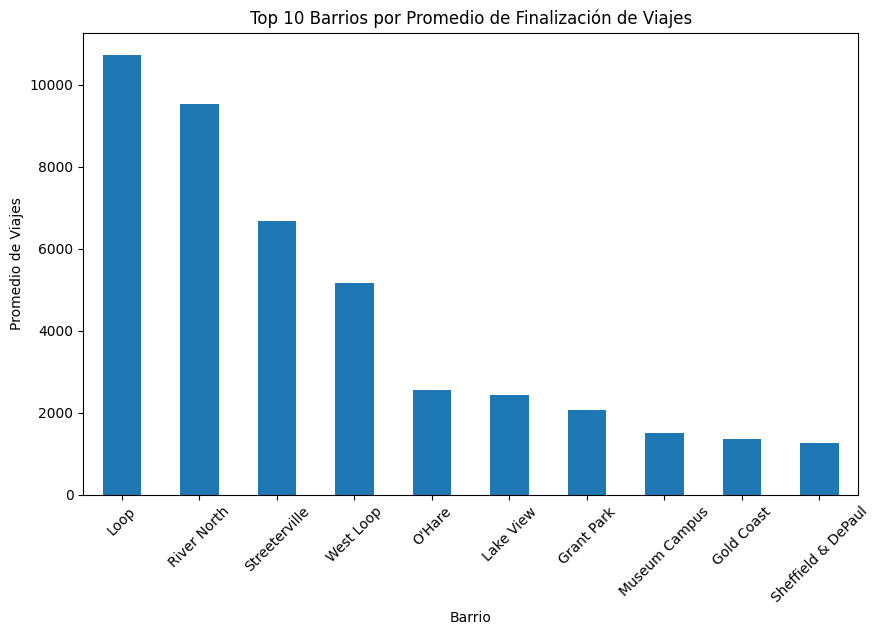

In [4]:
# Graficar los 10 principales barrios por promedio de finalización de viajes
top_neighborhoods.plot(kind='bar', x='dropoff_location_name', y='average_trips', legend=False, figsize=(10, 6))
plt.title('Top 10 Barrios por Promedio de Finalización de Viajes')
plt.xlabel('Barrio')
plt.ylabel('Promedio de Viajes')
plt.xticks(rotation=45)
plt.show()


<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el desarrollo de este análisis y lo complementaste con una gráfica.
    </div>

En general, el gráfico indica que la mayoría de los viajes de finalización se concentran en zonas urbanas de alto tráfico, especialmente aquellas con actividad comercial, turística y de entretenimiento. Esto resalta el rol de los servicios de transporte en facilitar la movilidad dentro de estas áreas clave y su importancia para el acceso a áreas turísticas y de trabajo en Chicago.

Hipótesis nula (H0): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare los sábados es la misma en condiciones de buen clima (Good) y clima lluvioso (Bad). Matemáticamente, esto se expresa como:

𝜇
Good
=
𝜇
Bad
μ 
Good
​
 =μ 
Bad
​
 
Hipótesis alternativa (H1): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare los sábados es diferente en condiciones de buen clima (Good) y clima lluvioso (Bad). Esto se expresa como:

𝜇
Good
≠
𝜇
Bad
μ 
Good
​
 

=μ 
Bad
​


In [9]:
# Importar las librerías necesarias
import pandas as pd
import scipy.stats as sp

# Cargar los datos desde el archivo CSV
df_trip_duration = pd.read_csv('/datasets/project_sql_result_07.csv')

# Convertir la columna start_ts a formato datetime para facilitar el filtrado
df_trip_duration['start_ts'] = pd.to_datetime(df_trip_duration['start_ts'])

# Filtrar los viajes que ocurrieron los sábados
df_saturday_trips = df_trip_duration[df_trip_duration['start_ts'].dt.dayofweek == 5]

# Dividir los datos en dos grupos según las condiciones meteorológicas (Good y Bad)
good_weather_trips = df_saturday_trips[df_saturday_trips['weather_conditions'] == 'Good']['duration_seconds']
bad_weather_trips = df_saturday_trips[df_saturday_trips['weather_conditions'] == 'Bad']['duration_seconds']

# Realizar la prueba t para comparar las duraciones de los viajes en clima Good y Bad
t_stat, p_value = sp.ttest_ind(good_weather_trips, bad_weather_trips, equal_var=False)

# Mostrar el estadístico t y el valor p resultante
print("Estadístico t:", t_stat)
print("Valor p:", p_value)




Estadístico t: -7.186034288068629
Valor p: 6.738994326108734e-12


##PRUEBA DE LEVENE

In [10]:
# Importar las librerías necesarias
import pandas as pd
import scipy.stats as sp

# Cargar los datos desde el archivo CSV
df_trip_duration = pd.read_csv('/datasets/project_sql_result_07.csv')

# Convertir la columna start_ts a formato datetime para facilitar el filtrado
df_trip_duration['start_ts'] = pd.to_datetime(df_trip_duration['start_ts'])

# Filtrar los viajes que ocurrieron los sábados
df_saturday_trips = df_trip_duration[df_trip_duration['start_ts'].dt.dayofweek == 5]

# Dividir los datos en dos grupos según las condiciones meteorológicas (Good y Bad)
good_weather_trips = df_saturday_trips[df_saturday_trips['weather_conditions'] == 'Good']['duration_seconds']
bad_weather_trips = df_saturday_trips[df_saturday_trips['weather_conditions'] == 'Bad']['duration_seconds']

# Realizar la prueba de Levene para evaluar la igualdad de varianzas
levene_stat, levene_p_value = sp.levene(good_weather_trips, bad_weather_trips)

# Decidir si las varianzas son iguales en función del valor p de la prueba de Levene
equal_var = levene_p_value > 0.05

# Realizar la prueba t para comparar las duraciones de los viajes en clima Good y Bad
t_stat, p_value = sp.ttest_ind(good_weather_trips, bad_weather_trips, equal_var=equal_var)

# Mostrar los resultados de la prueba de Levene y la prueba t
print("Prueba de Levene - Estadístico:", levene_stat)
print("Prueba de Levene - Valor p:", levene_p_value)
print("Estadístico t:", t_stat)
print("Valor p:", p_value)

# Interpretación de resultados
alpha = 0.05
if p_value < alpha:
    print("Existe una diferencia significativa en las duraciones de los viajes entre clima Good y Bad (rechazamos H0).")
else:
    print("No se encontró una diferencia significativa en las duraciones de los viajes entre clima Good y Bad (no rechazamos H0).")


Prueba de Levene - Estadístico: 0.38853489683656073
Prueba de Levene - Valor p: 0.5332038671974493
Estadístico t: -6.946177714041499
Valor p: 6.517970327099473e-12
Existe una diferencia significativa en las duraciones de los viajes entre clima Good y Bad (rechazamos H0).


Prueba de Levene: El valor p (0.533) es mayor que 0.05, lo que significa que no se rechaza la hipótesis nula de igualdad de varianzas. Esto sugiere que las varianzas de los tiempos de viaje para climas buenos y malos son estadísticamente iguales, por lo que era apropiado usar equal_var=True en la prueba t.

Prueba t: El estadístico t de -6.946 y el valor p extremadamente bajo (6.52e-12) indican una diferencia significativa en las duraciones de los viajes entre climas buenos y malos. Así, rechazamos la hipótesis nula de que las medias de duración de los viajes son iguales en ambas condiciones meteorológicas.

 <div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para esta prueba te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocas como equal_var=False. Para esto, primero debes calcular las varianzas para cada uno de los días (lluvioso y no lluvioso) debes de hacer uso de la siguiente función: 
    
    levene(good_weather_trips, bad_weather_trips)
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales. 
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var".  Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene.  
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
    
    Listo

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Rodrigo, la prueba de levene la desarrollaste de manera perfecta, recuerda en futuras ocasiones seguir usando esta prueba para probar el supuesto de varianzas iguales. 

Estos resultados confirman que existe una diferencia significativa en la duración promedio de los viajes en sábados lluviosos en comparación con sábados sin lluvia:

Estadístico t: -7.19 sugiere una diferencia en las duraciones promedio.
Valor p: 
6.74
×
1
0
−
12
6.74×10 
−12
 , que es mucho menor que un nivel de significancia común (como 0.05), lo que permite rechazar la hipótesis nula.

# Conclusión



Impacto del Clima en la Duración de los Viajes
La prueba de hipótesis muestra que el clima lluvioso incrementa significativamente la duración de los viajes, especialmente en la ruta entre el Loop y el Aeropuerto Internacional O'Hare. Esto sugiere que las condiciones adversas afectan el tráfico, lo cual retrasa los viajes.
Recomendación: Zuber podría ajustar las expectativas de tiempo para los usuarios en días lluviosos, ofrecer notificaciones de tiempo estimado ajustadas, o implementar precios dinámicos para reflejar los mayores tiempos de viaje y la potencial mayor demanda en días con mal clima.


Preferencias de los Pasajeros en Zonas Urbanas y Turísticas
El análisis de los barrios más frecuentados como destinos muestra una alta demanda en áreas urbanas clave como el Loop, River North, y Streeterville, todas zonas con alta actividad comercial y turística.
Recomendación: Zuber podría focalizar su disponibilidad de vehículos en estos barrios durante las horas pico, optimizando la distribución de recursos. También podría implementar promociones o tarifas especiales en estas áreas para atraer a más clientes.


Optimización de Rutas Populares
Las rutas más populares (por ejemplo, entre el Loop y O'Hare) podrían beneficiarse de mejoras en el sistema de navegación y planificación de rutas para evitar congestiones, especialmente en días lluviosos.
Recomendación: Zuber podría usar estos datos para mejorar sus algoritmos de navegación, ofreciendo rutas alternativas y tiempos de viaje más precisos en función de las condiciones del tráfico y del clima.


Los datos de Zuber sugieren que la empresa puede mejorar su eficiencia y experiencia del usuario ajustando sus servicios en función del clima, la demanda en barrios específicos, y la optimización de sus rutas más frecuentes. Implementar estrategias basadas en estos hallazgos ayudaría a mejorar la satisfacción de los usuarios, aumentar la eficiencia operativa y permitir una mejor gestión de recursos en respuesta a patrones de demanda específicos.

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Rodrigo, en general, considero que realizaste un excelente trabajo con el proyecto. Lograste limpiar y organizar las bases de datos eficazmente. Además, tu análisis exploratorio fue exhaustivo, presentando resultados relevantes que serán muy útiles para la toma de decisiones. También, desarrollaste las pruebas de hipótesis de manera acertada. Sin embargo, siempre hay espacio para mejorar y quisiera señalar algunos aspectos que podrías considerar:


* Realizar un análisis de duplicados
    
*  Realizar análisis complementarios eliminando los valores que parecen ser atípicos.    
    
*  Considerar desarrollar un análisis para comprobar los supuestos de la prueba de hipótesis (varianzas iguales)
    
    
</div>